<a href="https://colab.research.google.com/github/marsavil/Data_Science_Notebooks/blob/main/Data%20Science%3A%20probando%20relaciones%20con%20regresi%C3%B3n%20lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Precificación inmobiliaria**

**Objetivo**: Estimar los precios de los inmuebles.
 * Identificar los aspectos que tienen más influencia en la precificación de los inmuebles.
 * Entender cuál de todos estos aspectos es el más relevante.
 * Precificar un inmueble nuevo.

Base de datos simplificada e inspirada en [House Prices](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)



![](https://i.imgur.com/A8X79yq.jpeg)


# 1. Ajustando una recta

## Conociendo los datos

In [210]:
#Leyendo los datos
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/alura-es-cursos/2145-data-science-probando-relaciones-con-regresion-lineal/refs/heads/main/precios_casas.csv')
df.head()


,Id,area_primer_piso,tiene_segundo_piso,area_segundo_piso,cantidad_banos,capacidad_carros_garage,calidad_de_cocina_excelente,precio_de_venta
0,1,79.5224,1,79.3366,2,548,0,1027905.0
1,2,117.2398,0,0.0000,2,460,0,894795.0
2,3,85.4680,1,80.4514,2,608,0,1101855.0
3,4,89.2769,1,70.2324,1,642,0,690200.0
4,5,106.3705,1,97.8237,2,836,0,1232500.0


In [211]:
#Cuáles factores fueron colectados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Id                           1438 non-null   int64  
 1   area_primer_piso             1438 non-null   float64
 2   tiene_segundo_piso           1438 non-null   int64  
 3   area_segundo_piso            1438 non-null   float64
 4   cantidad_banos               1438 non-null   int64  
 5   capacidad_carros_garage      1438 non-null   int64  
 6   calidad_de_cocina_excelente  1438 non-null   int64  
 7   precio_de_venta              1438 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 90.0 KB


In [212]:
df.drop(columns='Id', inplace=True)
df.columns

Index(['area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente', 'precio_de_venta'],
      dtype='object')

## Correlación

**¿Cuáles factores están relacionados con el precio de la casa? ¿Cómo es esa relación?**

El coeficiente de correlación de Pearson nos permite medir la relación lineal entre variables, ofreciendo una escala que varía de -1 a 1, la cual interpretamos según su intensidad y dirección:

* **-1**: correlación negativa perfecta: a medida que una variable aumenta, la otra disminuye.  
* **0**: no hay relación lineal entre las variables.  
* **1**: correlación positiva perfecta: a medida que una variable aumenta, la otra también aumenta.  



In [213]:
# Correlación
corr = df.corr()

In [214]:
corr['precio_de_venta']

area_primer_piso               0.616557
tiene_segundo_piso             0.138541
area_segundo_piso              0.305311
cantidad_banos                 0.563132
capacidad_carros_garage        0.640214
calidad_de_cocina_excelente    0.496223
precio_de_venta                1.000000
Name: precio_de_venta, dtype: float64

In [215]:
# Actividad
# Cuáles factores están más correlacionados?


correlaciones = df.corr()

for i, col in enumerate(df.columns):
    print(f'Correlaciones de la columna "{col}":')
    print(correlaciones[col])
    print('-' * 40)




Correlaciones de la columna "area_primer_piso":
area_primer_piso               1.000000
tiene_segundo_piso            -0.376805
area_segundo_piso             -0.253793
cantidad_banos                 0.369368
capacidad_carros_garage        0.481231
calidad_de_cocina_excelente    0.323496
precio_de_venta                0.616557
Name: area_primer_piso, dtype: float64
----------------------------------------
Correlaciones de la columna "tiene_segundo_piso":
area_primer_piso              -0.376805
tiene_segundo_piso             1.000000
area_segundo_piso              0.917101
cantidad_banos                 0.292780
capacidad_carros_garage       -0.001284
calidad_de_cocina_excelente   -0.020045
precio_de_venta                0.138541
Name: tiene_segundo_piso, dtype: float64
----------------------------------------
Correlaciones de la columna "area_segundo_piso":
area_primer_piso              -0.253793
tiene_segundo_piso             0.917101
area_segundo_piso              1.000000
cantidad_ba

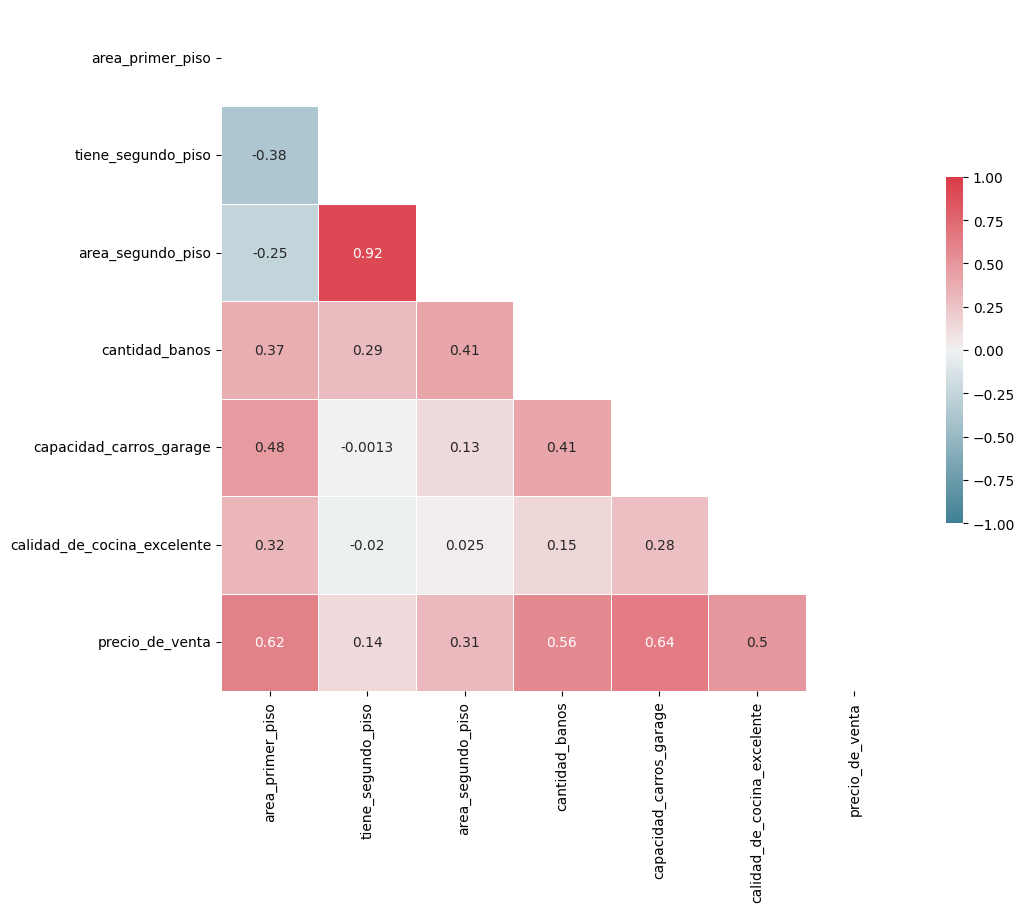

In [216]:
# Mostrar el mapa de calor (heatmap)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generar una máscara para el triángulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})
plt.show()

## Relacionando variables

In [217]:
# importando los paquetes para la visualización
import plotly.express as px

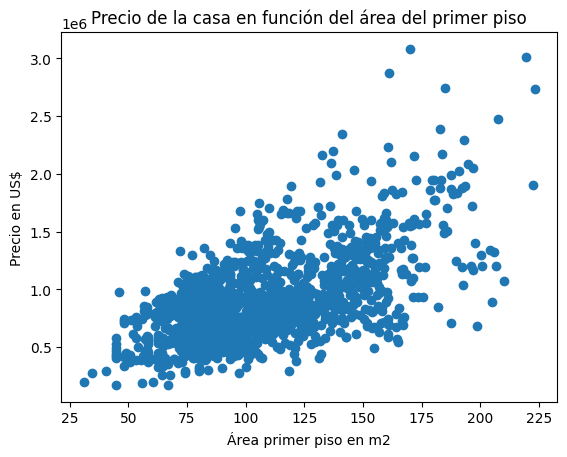

In [218]:
# Cómo se relacionan el área construída y el precio del inmueble?

plt.scatter(df['area_primer_piso'], df['precio_de_venta'])
plt.title('Precio de la casa en función del área del primer piso')
plt.xlabel('Área primer piso en m2')
plt.ylabel('Precio en US$')
plt.show()

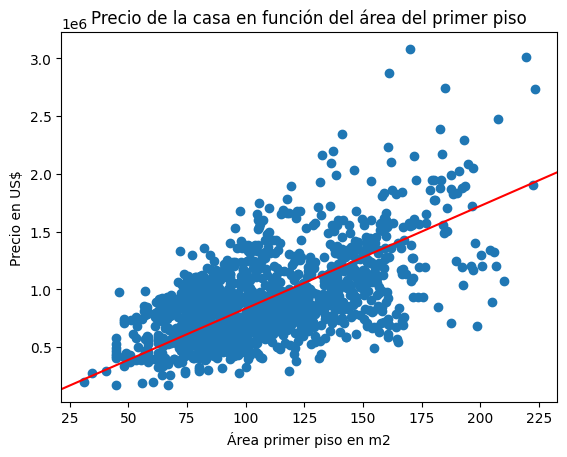

In [219]:
# Aparentemente mientras mayor es el área del primer piso, mayor es el precio de la casa.
# E si quisieramos trazar una línea que nos permita describir este comportamiento?
plt.scatter(df['area_primer_piso'], df['precio_de_venta'])
plt.title('Precio de la casa en función del área del primer piso')
plt.axline(xy1=(40,300000), xy2=(175,1500000),  color='red')
plt.xlabel('Área primer piso en m2')
plt.ylabel('Precio en US$')
plt.show()

## Mejor recta

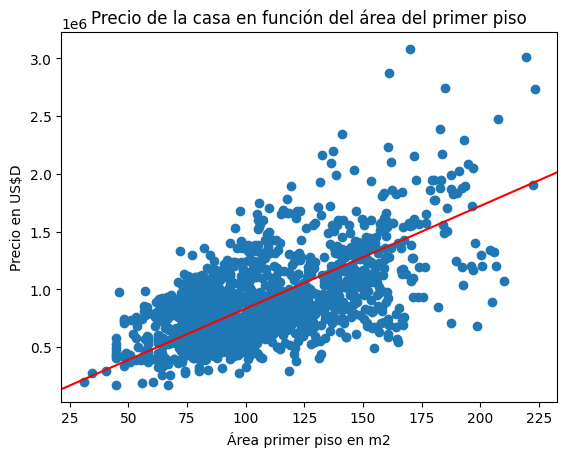

In [220]:
# Cuál es la recta que mejor se ajusta a esta relación
# Aparentemente mientras mayor es el área del primer piso, mayor es el precio de la casa.
# E si quisieramos trazar una línea que nos permita describir este comportamiento?
plt.scatter(df['area_primer_piso'], df['precio_de_venta'])
plt.title('Precio de la casa en función del área del primer piso')
plt.axline(xy1=(40,300000), xy2=(175,1500000),  color='red')
plt.xlabel('Área primer piso en m2')
plt.ylabel('Precio en US$D')
plt.show()

In [221]:
# Aparentemente mientras mayor es el área del primer piso, mayor es el precio de la casa.
# E si quisieramos trazar una línea que nos permita describir este comportamiento?
px.scatter(df, x='area_primer_piso',
           y='precio_de_venta',
           trendline='ols',
           trendline_color_override='red',
           title='Precio de la casa en función del área del primer piso',
           labels={'area_primer_piso': 'Área primer piso en m2', 'precio_de_venta': 'Precio en US$D'})



# 2. Explicando la recta
Ajustamos una recta entre los $m^2$ del primer piso y el precio de la casa. Queremos explicar el precio de la casa a partir de su tamaño, por eso decimos que:

* Variable explicativa/independiente: Área del primer piso  
* Variable de respuesta/dependiente: Precio de la casa  

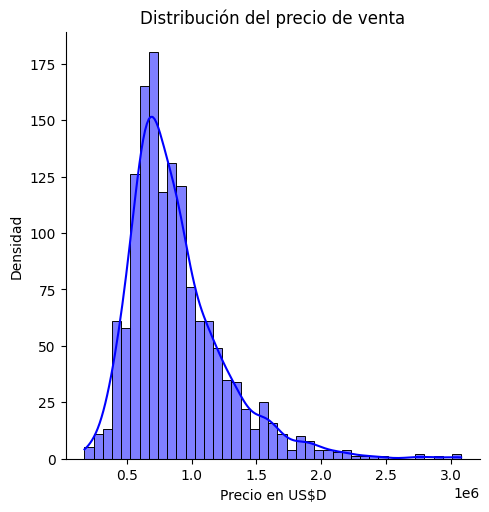

In [222]:
#Quién es nuestra variable de respuesta?
sns.displot(df['precio_de_venta'], kde=True, color='blue')
plt.title('Distribución del precio de venta')
plt.xlabel('Precio en US$D')
plt.ylabel('Densidad')
plt.show()

### Separando datos para entrenamiento y para prueba

El conjunto de **entrenamiento** se utiliza para ajustar el modelo, mientras que el conjunto de **prueba** se usa para evaluar su desempeño al predecir precios de viviendas no vistos durante el entrenamiento, lo que ayuda a la generalización del modelo.

In [223]:
# import train_test_split
from sklearn.model_selection import train_test_split

In [224]:
y = df['precio_de_venta']
X = df.drop(columns='precio_de_venta')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=230)

In [225]:
#Datos de entrenamiento para usar la fórmula
df_train = pd.DataFrame(X_train)
df_train['precio_de_venta'] = y_train

In [226]:
# import ols
from statsmodels.formula.api import ols

In [227]:
# ajustando el primer modelo
model_0 = ols('precio_de_venta ~ area_primer_piso', data=df_train).fit()

## Analizando los coeficientes

(intensidad, dirección y significancia)




In [228]:
# visualizando los parámetros
model_0.params

Intercept           152909.288334
area_primer_piso      6793.641641
dtype: float64

In [229]:
# El resumen del modelo
print(model_0.summary())

                            OLS Regression Results                            
Dep. Variable:        precio_de_venta   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     608.3
Date:                Thu, 10 Jul 2025   Prob (F-statistic):          2.22e-105
Time:                        12:06:59   Log-Likelihood:                -14082.
No. Observations:                1006   AIC:                         2.817e+04
Df Residuals:                    1004   BIC:                         2.818e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.529e+05   3.07e+04  

- El **punto de intercepción** es el valor esperado del precio de la casa cuando todas las demás variables son cero. En este caso, cuando todas las demás variables, incluida el área del primer piso, son cero, el precio esperado de la casa es de $145.196,40. No siempre se tiene una interpretación práctica para este número.

- El **efecto individual** del área es de \$6.833,97. Esto indica que por cada metro cuadrado adicional al área del primer piso, se espera que el precio de la casa aumente en promedio \$6.833,97.

<img src="https://i.ibb.co/CJwfMgW/coeficientes.png" alt="coeficientes" border="0">


## Explicabilidad del modelo

**¿En qué medida la variación del área explica los diversos precios de las casas?**  

En este caso, recurrimos a la métrica R², el coeficiente de determinación. El R² varía de 0 a 1, donde 1 indica un ajuste perfecto del modelo a los datos, es decir, todas las variaciones en la variable dependiente son explicadas por las variables independientes en el modelo. Por otro lado, un R² de 0 indica que el modelo no explica ninguna variabilidad en la variable dependiente.

In [230]:
# observando el R²
model_0.rsquared

np.float64(0.37728010994297867)

## Entendiendo el resíduo

In [231]:
# Quiénes son los residuos?
model_0.resid

1303   -193023.838744
326    -144522.356193
386     399612.747641
615     -68449.596607
236     166010.592859
            ...      
777     465872.680999
271    -497642.319788
723     461150.204718
560    -540482.733402
768     -37547.820756
Length: 1006, dtype: float64

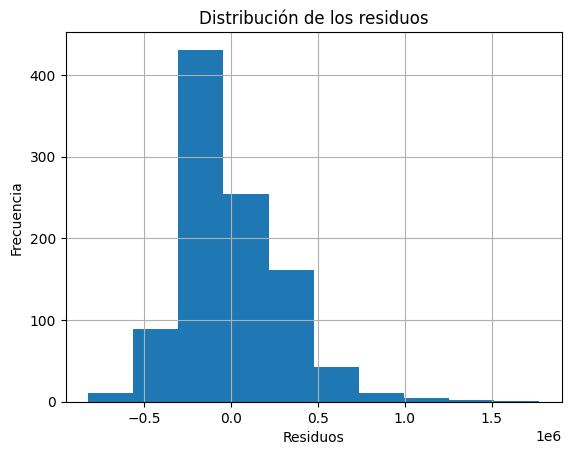

In [232]:
# Cómo están distribuidos
model_0.resid.hist()
plt.title('Distribución de los residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

<img src="https://i.ibb.co/zGTB35V/residuos.png" alt="residuos" border="0">

## Obteniendo el R² de la previsión

In [233]:
# definiendo la 'Y' prevista
y_predict = model_0.predict(X_test) #Se predicen los datos de "Y" a partir del modelo de prueba. Datos que el modelo aún no ha visto durante el entrenamiento

In [234]:
# importando el r2_score
from sklearn.metrics import r2_score

In [235]:
# mostrando el resultado de R²
print(f'El coeficiente de determinación R² para el modelo con los datos de prueba es de: {r2_score(y_test, y_predict):.2f}')

El coeficiente de determinación R² para el modelo con los datos de prueba es de: 0.39


# 3. Añadiendo otras características

El modelo con un solo factor nos mostró un R² de 0.38, es decir, aproximadamente el 38% de la variación observada en los precios de las casas puede explicarse por la variación en el área.  
Esto indica que aún existe una cantidad significativa de variación que no está siendo capturada por este modelo específico. Analizaremos otros factores para explicar el precio de las casas.

## Analizando los factores

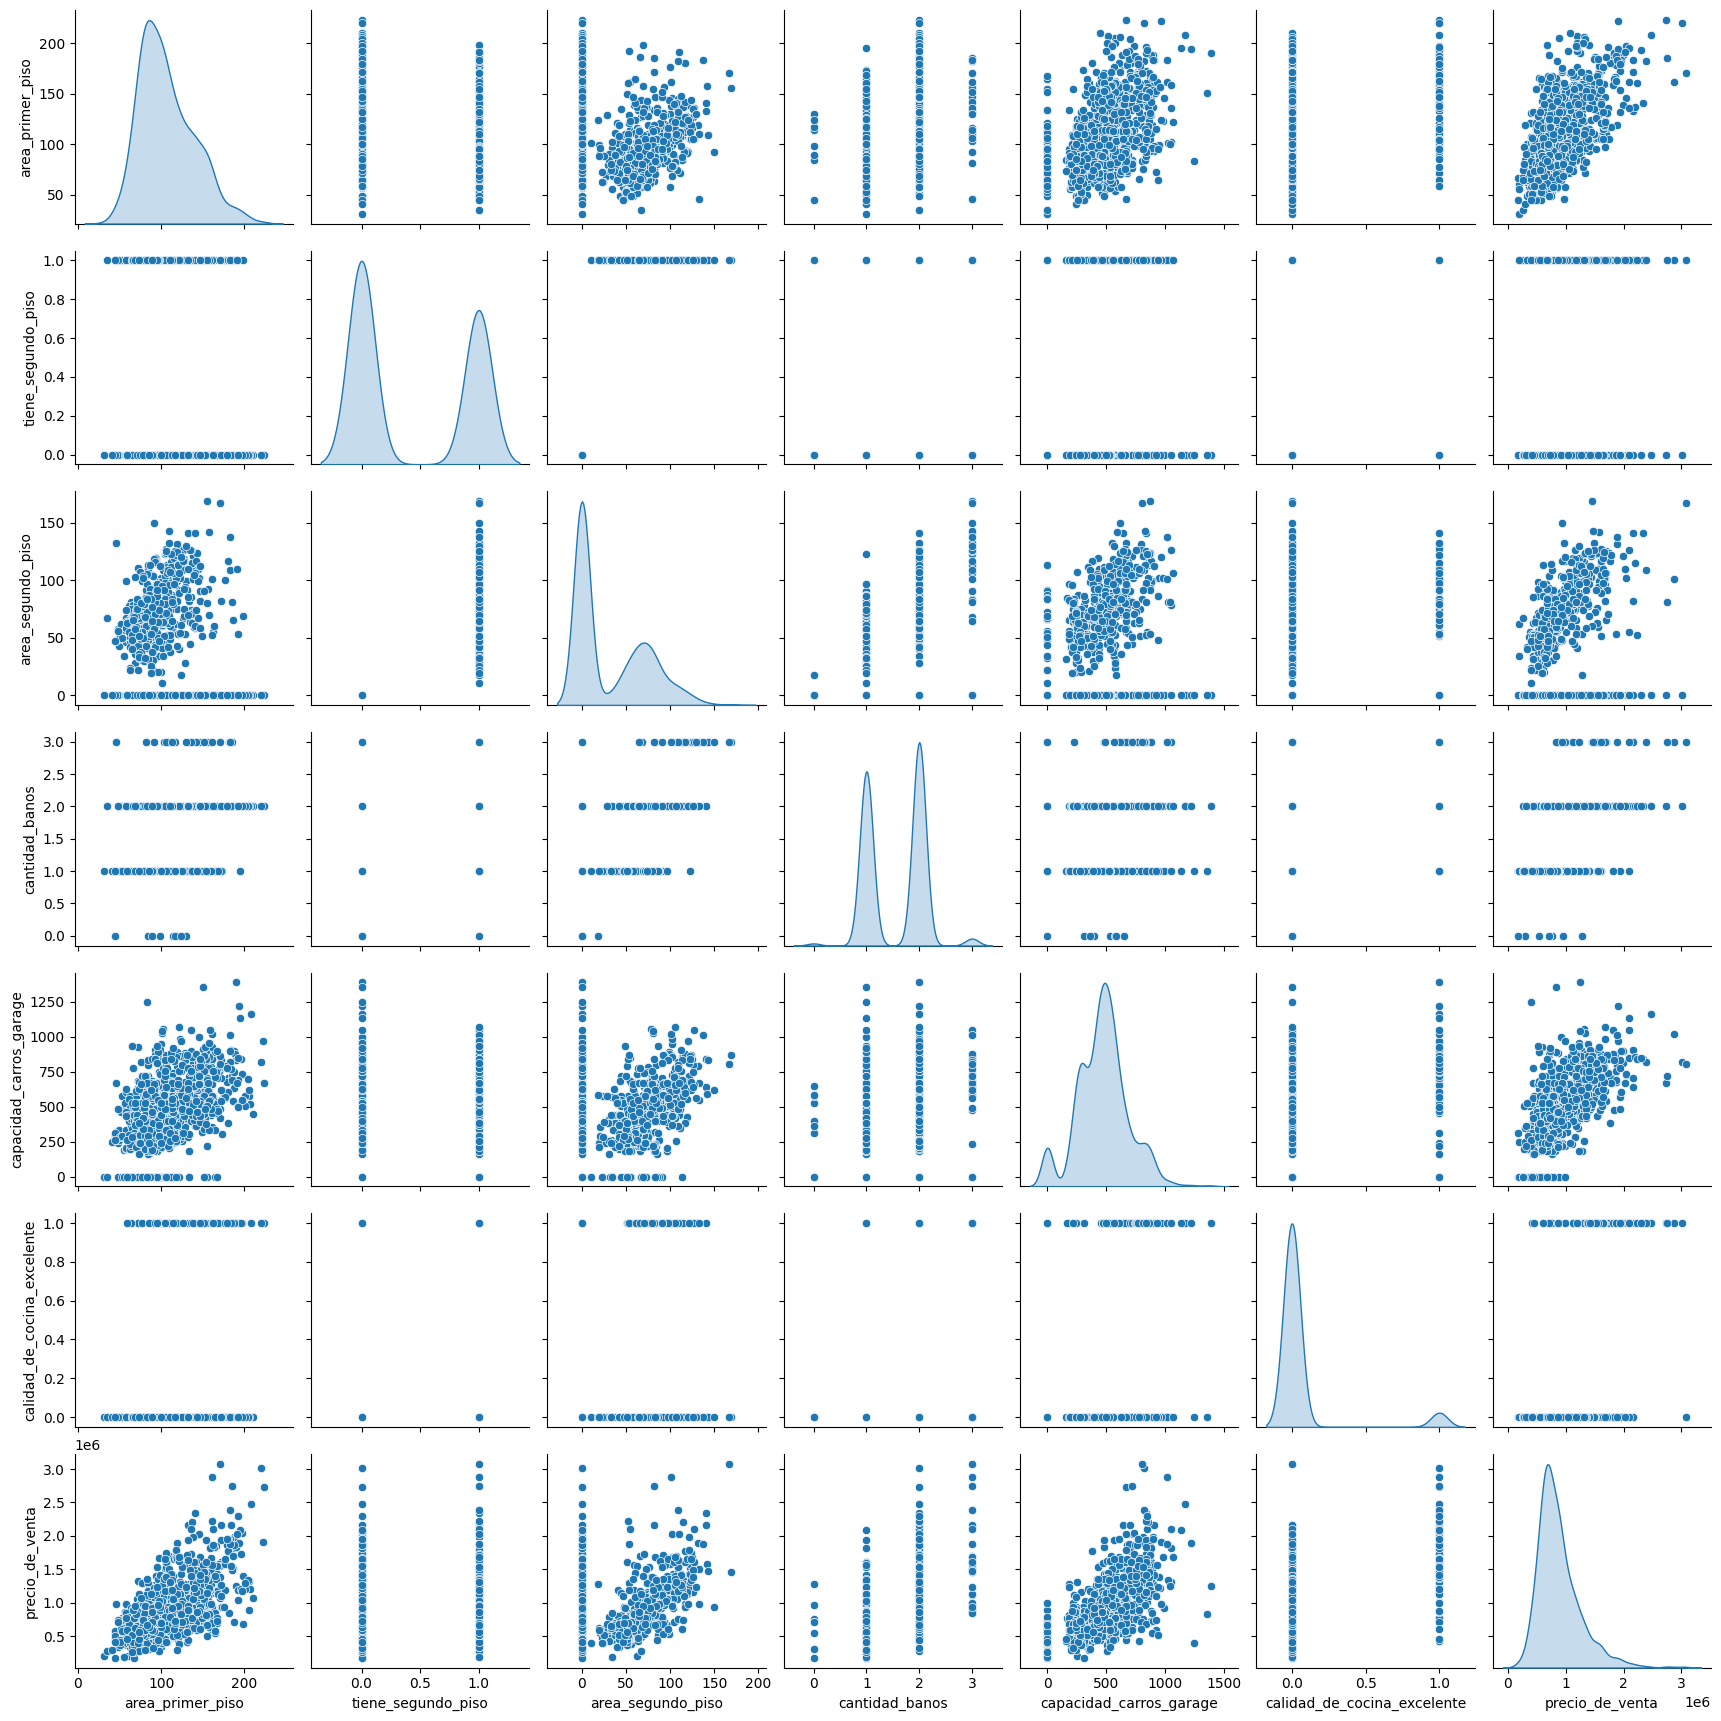

In [236]:
# cuáles otras características podrían explicar el precio de los inmuebles?
sns.pairplot(df, diag_kind='kde')
plt.show()

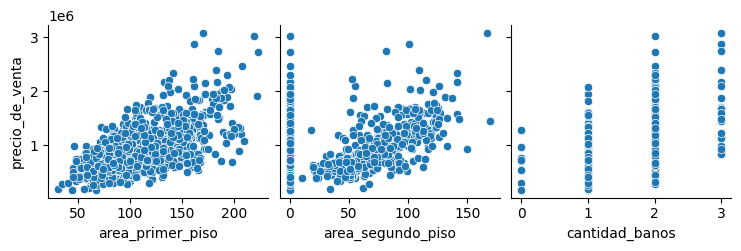

In [237]:
#Vamos a analizar solamente y_vars='precio_de_venta'
sns.pairplot(df, y_vars='precio_de_venta', x_vars=['area_primer_piso','area_segundo_piso',
       'cantidad_banos'], diag_kind='kde')
plt.show()

## Añadiendo factores al modelo

In [238]:
# importando la api de statsmodels
import statsmodels.api as sm

In [239]:
# Añadiendo una constante
X_train = sm.add_constant(X_train) # añadir una constante nos va a permitir estimar mejor el valor de intersección del eje "Y"
X_train.head()

,const,area_primer_piso,tiene_segundo_piso,area_segundo_piso,cantidad_banos,capacidad_carros_garage,calidad_de_cocina_excelente
1303,1.0,65.7732,0,0.0000,1,0,0
326,1.0,55.3684,1,55.3684,1,189,0
386,1.0,74.6916,1,107.4853,2,560,0
615,1.0,103.6764,0,0.0000,1,440,0
236,1.0,94.2006,1,67.8170,2,457,0


In [240]:
from ast import mod
# Creando el modelo de regresión (con todas las variables): saturado
X_train.columns

model_1 = sm.OLS(y_train, X_train[['const', 'area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
                                  'cantidad_banos', 'capacidad_carros_garage',
                                  'calidad_de_cocina_excelente']]).fit()



In [241]:
# Modelo sin el área del segundo piso
model_2 = sm.OLS(y_train, X_train[['const', 'area_primer_piso', 'tiene_segundo_piso','cantidad_banos', 'capacidad_carros_garage',
                                  'calidad_de_cocina_excelente']]).fit()

In [242]:
# Modelo sin la información del garage
# Modelo sin el área del segundo piso
model_3 = sm.OLS(y_train, X_train[['const', 'area_primer_piso', 'tiene_segundo_piso',
                                  'cantidad_banos','calidad_de_cocina_excelente']]).fit()

In [243]:
# Resumen del modelos
models = [model_0, model_1, model_2, model_3]

for i,j in enumerate(models):
  print(f'******************************************************************************\n******************* El modelo {i} tiene el siguiente resumen *******************\n******************************************************************************')
  print(f'{j.summary()}\n\n')

******************************************************************************
******************* El modelo 0 tiene el siguiente resumen *******************
******************************************************************************
                            OLS Regression Results                            
Dep. Variable:        precio_de_venta   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     608.3
Date:                Thu, 10 Jul 2025   Prob (F-statistic):          2.22e-105
Time:                        12:07:20   Log-Likelihood:                -14082.
No. Observations:                1006   AIC:                         2.817e+04
Df Residuals:                    1004   BIC:                         2.818e+04
Df Model:                           1                                         
Covariance Type:            nonrobust               

In [244]:
for i,j in enumerate(models):
  print(f'El coeficiente de determinación R² del modelo {i} es de: {j.rsquared:.2f}')

El coeficiente de determinación R² del modelo 0 es de: 0.38
El coeficiente de determinación R² del modelo 1 es de: 0.74
El coeficiente de determinación R² del modelo 2 es de: 0.71
El coeficiente de determinación R² del modelo 3 es de: 0.65


## Comparando los modelos
Cuál es el modelo?


In [245]:
# Cuántos parámetros tiene el modelo?
model_3.params

const                         -129979.678094
area_primer_piso                 6119.653184
tiene_segundo_piso             221306.959705
cantidad_banos                 149036.289458
calidad_de_cocina_excelente    444391.228573
dtype: float64

### Ejericicio



Como persona Científica de Datos, estás a cargo del análisis del problema de fijación de precios de habitaciones de hoteles, utilizando el conjunto de datos proporcionado. Para ello, dispones de este dataset.

En esta actividad, tu tarea consiste en llevar a cabo las siguientes etapas:

 1. Análisis inicial con el PairPlot de Seaborn;
 2. Construir modelos de regresión lineal;
 3. Comparación de estos modelos.



In [246]:
id = '1tE648yq4MiGtCjyWRZNw76iAP1Ydc1a_'
url = f'https://drive.google.com/uc?id={id}'


dataset = pd.read_csv(url)
dataset.head()


,Estrelas,ProximidadeTurismo,Capacidade,Preco
0,5,9.301565,3,506.275452
1,1,1.785891,1,246.363458
2,4,15.504293,3,325.873550
3,4,4.173188,3,521.343284
4,4,9.443685,1,252.587087


#### 1 - análisis inicial con el PairPlot de Seaborn;

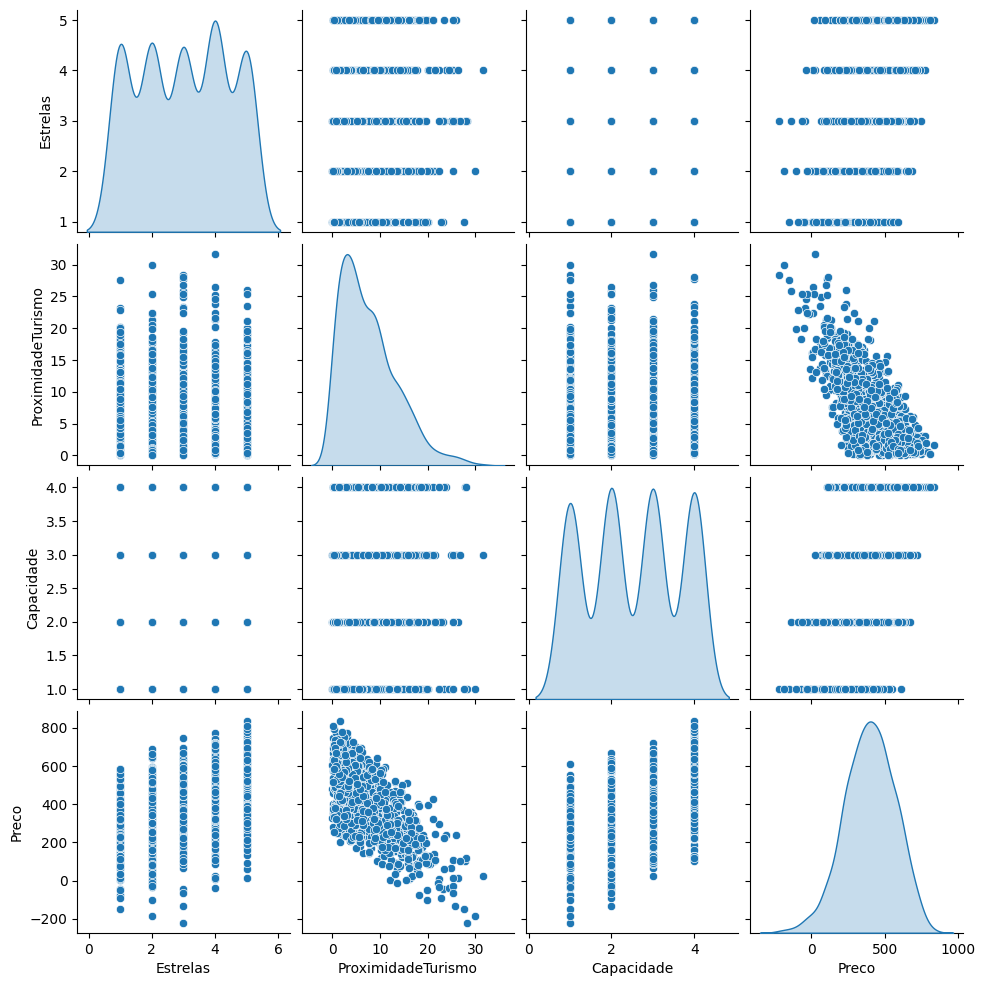

In [247]:
sns.pairplot(dataset, diag_kind='kde')
plt.show()

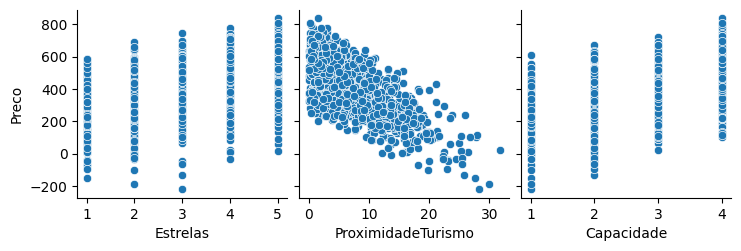

In [248]:
sns.pairplot(dataset, y_vars='Preco', x_vars=['Estrelas','ProximidadeTurismo',
       'Capacidade'], diag_kind='kde')
plt.show()

#### 2 -  Construir modelos de regresión lineal

In [249]:
y = dataset['Preco']
X = dataset.drop(columns='Preco')

X_data_train, X_data_test, y_data_train, y_data_test = train_test_split(X, y, test_size=0.3, random_state=29)

In [250]:
#Datos de entrenamiento para usar la fórmula
data_train = pd.DataFrame(X_data_train)
data_train['Preco'] = y_data_train

In [251]:
# ajustando el primer modelo
data_model_0 = ols('Preco ~ Estrelas', data=data_train).fit()

In [252]:
data_model_0.params


Intercept    268.225473
Estrelas      44.725072
dtype: float64

In [253]:
# El resumen del modelo
print(data_model_0.summary(),'\n\n')

# observando el R²
print(f'El R² del modelo 0 es del {round(data_model_0.rsquared, 2)*100}%')

                            OLS Regression Results                            
Dep. Variable:                  Preco   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     122.0
Date:                Thu, 10 Jul 2025   Prob (F-statistic):           3.02e-26
Time:                        12:07:30   Log-Likelihood:                -4515.7
No. Observations:                 700   AIC:                             9035.
Df Residuals:                     698   BIC:                             9044.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    268.2255     13.484     19.892      0.0

In [254]:
# Residuos del modelo
data_model_0.resid

719    -51.115654
407    288.074139
692    113.104276
875     68.018913
908     40.857992
          ...    
546   -163.606353
509    133.359660
236    238.615416
371    -32.244545
981    -12.454480
Length: 700, dtype: float64

In [255]:
# definiendo la 'Y' prevista
data_y_predict = data_model_0.predict(X_data_test)

In [256]:
# mostrando el resultado de R²
print(f'El coeficiente de determinación R² para el modelo con los datos de prueba es de: {r2_score(y_data_test, data_y_predict):.2f}')

El coeficiente de determinación R² para el modelo con los datos de prueba es de: 0.17


In [257]:
X_data_train = sm.add_constant(X_data_train)
X_data_train.head()

,const,Estrelas,ProximidadeTurismo,Capacidade
719,1.0,3,5.216415,1
407,1.0,5,2.014799,4
692,1.0,4,5.023282,3
875,1.0,4,3.093776,3
908,1.0,3,0.986675,2


#### 3 - Comparación de estos modelos

In [258]:
# Creando el modelo de regresión (con todas las variables): saturado


data_model_1 = sm.OLS(y_data_train, X_data_train[['const',	'Estrelas',	'ProximidadeTurismo',	'Capacidade']]).fit()

# Modelo sin Estrellas

data_model_2 = sm.OLS(y_data_train, X_data_train[['const',	'ProximidadeTurismo',	'Capacidade']]).fit()

# Modelo sin ProximidadeTurismo

data_model_3 = sm.OLS(y_data_train, X_data_train[['const',	'Estrelas',	'Capacidade']]).fit()

# Modelo sin Capacidade

data_model_4 = sm.OLS(y_data_train, X_data_train[['const',	'Estrelas',	'ProximidadeTurismo']]).fit()


data_models = [data_model_0, data_model_1, data_model_2, data_model_3, data_model_4]

for i,j in enumerate(data_models):
  print(f'******************************************************************************\n******************* El modelo {i} tiene el siguiente resumen *******************\n******************************************************************************')
  print(f'{j.summary()}\n\n')


for i,j in enumerate(data_models):
  print(f'El coeficiente de determinación R² del modelo {i} es de: {j.rsquared:.2f}')


******************************************************************************
******************* El modelo 0 tiene el siguiente resumen *******************
******************************************************************************
                            OLS Regression Results                            
Dep. Variable:                  Preco   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     122.0
Date:                Thu, 10 Jul 2025   Prob (F-statistic):           3.02e-26
Time:                        12:07:32   Log-Likelihood:                -4515.7
No. Observations:                 700   AIC:                             9035.
Df Residuals:                     698   BIC:                             9044.
Df Model:                           1                                         
Covariance Type:            nonrobust               

# 4. Precificando las casas

## Obteniendo el R² de la previsión

In [259]:
# Añadiendo una constante en X_test
X_test = sm.add_constant(X_test)
X_test.head(2)

,const,area_primer_piso,tiene_segundo_piso,area_segundo_piso,cantidad_banos,capacidad_carros_garage,calidad_de_cocina_excelente
997,1.0,94.9438,0,0.0000,1,280,0
805,1.0,74.1342,1,78.2218,2,595,0


In [260]:
# Previsión con el modelo 3
predict_model_3 = model_3.predict(X_test[['const', 'area_primer_piso', 'tiene_segundo_piso',
                                  'cantidad_banos','calidad_de_cocina_excelente']])

In [261]:
# Cuál es el r² de la previsión?
print(f'El coeficiente R² de la prevision es {model_3.rsquared:.2f}')

El coeficiente R² de la prevision es 0.65


In [262]:
# Cuál es el R² del entrenamiento?
print(f' El coeficiente de R² con respecto a la base de entrenamiento es {r2_score(y_test, predict_model_3):.2f}')

 El coeficiente de R² con respecto a la base de entrenamiento es 0.64


## Precificando una casa

<img src="https://i.ibb.co/SvG4V4j/costo.png" alt="costo" border="0">

In [263]:
df.columns


Index(['area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente', 'precio_de_venta'],
      dtype='object')

In [264]:
#Nuevo inmueble
nuevo_inmueble = pd.DataFrame({
    'const': [1],
    'area_primer_piso': [120],
    'tiene_segundo_piso': [1],
    'cantidad_banos':[2],
    'calidad_de_cocina_excelente':[0],
})

In [265]:
# Cuál es el precio del inmueble de acuerdo con el modelo 0?
model_0.predict(nuevo_inmueble['area_primer_piso']).round(2)

0    968146.29
dtype: float64

In [266]:
#Cuál es el precio del inmueble de acuerdo con el modelo 3?
model_3.predict(nuevo_inmueble).round(2)

0    1123758.24
dtype: float64

In [267]:
model_3.params

const                         -129979.678094
area_primer_piso                 6119.653184
tiene_segundo_piso             221306.959705
cantidad_banos                 149036.289458
calidad_de_cocina_excelente    444391.228573
dtype: float64

In [268]:
precio_manual = (
    nuevo_inmueble.const * model_3.params.const +
    nuevo_inmueble.area_primer_piso * model_3.params.area_primer_piso +
    nuevo_inmueble.tiene_segundo_piso * model_3.params.tiene_segundo_piso +
    nuevo_inmueble.cantidad_banos * model_3.params.cantidad_banos +
    nuevo_inmueble.calidad_de_cocina_excelente * model_3.params.calidad_de_cocina_excelente
)


precio_manual

0    1.123758e+06
dtype: float64

In [269]:
model_3.predict(nuevo_inmueble).round(2) == precio_manual.round(2)

0    True
dtype: bool

## Precificando varias casas

<img src="https://i.imgur.com/i0skFlB.jpeg" width="600"/>

In [270]:
# Leyendo varias casas?
url = 'https://raw.githubusercontent.com/alura-es-cursos/2145-data-science-probando-relaciones-con-regresion-lineal/refs/heads/aula-4/nuevas_casas.csv'

df_nuevas_casas = pd.read_csv(url, sep=';')
df_nuevas_casas

,Casa,area_primer_piso,tiene_segundo_piso,cantidad_banos,calidad_de_cocina_excelente
0,1,150,1,2,1
1,2,180,0,3,1
2,3,120,1,2,1
3,4,200,1,3,1
4,5,160,0,2,1
5,6,140,1,2,0
6,7,170,0,3,0
7,8,190,1,2,0
8,9,130,0,2,0
9,10,180,1,3,0


In [271]:
df_nuevas_casas.drop(columns='Casa', inplace=True)
df_nuevas_casas

,area_primer_piso,tiene_segundo_piso,cantidad_banos,calidad_de_cocina_excelente
0,150,1,2,1
1,180,0,3,1
2,120,1,2,1
3,200,1,3,1
4,160,0,2,1
5,140,1,2,0
6,170,0,3,0
7,190,1,2,0
8,130,0,2,0
9,180,1,3,0


In [272]:
# Añadiendo una constante
df_nuevas_casas = sm.add_constant(df_nuevas_casas)
df_nuevas_casas

,const,area_primer_piso,tiene_segundo_piso,cantidad_banos,calidad_de_cocina_excelente
0,1.0,150,1,2,1
1,1.0,180,0,3,1
2,1.0,120,1,2,1
3,1.0,200,1,3,1
4,1.0,160,0,2,1
5,1.0,140,1,2,0
6,1.0,170,0,3,0
7,1.0,190,1,2,0
8,1.0,130,0,2,0
9,1.0,180,1,3,0


In [273]:
# Cuál es el precio de estas nuevas casas?
# precio_casas = pd.DataFrame()

df_nuevas_casas['Precio de Venta'] = model_3.predict(df_nuevas_casas).round(2)
df_nuevas_casas


,const,area_primer_piso,tiene_segundo_piso,cantidad_banos,calidad_de_cocina_excelente,Precio de Venta
0,1.0,150,1,2,1,1751739.07
1,1.0,180,0,3,1,1863057.99
2,1.0,120,1,2,1,1568149.47
3,1.0,200,1,3,1,2206758.02
4,1.0,160,0,2,1,1591628.64
5,1.0,140,1,2,0,1246151.31
6,1.0,170,0,3,0,1357470.23
7,1.0,190,1,2,0,1552133.97
8,1.0,130,0,2,0,963647.81
9,1.0,180,1,3,0,1639973.72


### Ejercicio

Recibiste una solicitud para estimar el precio de una casa con las siguientes características:

 * 1 baño
 * Área 98m²
 * No tiene segundo piso
 * Calidad de la cocina excelente

In [274]:
nuevo_inmueble_2 = pd.DataFrame({
    'const': [1],
    'area_primer_piso': [98],
    'tiene_segundo_piso': [0],
    'cantidad_banos':[1],
    'calidad_de_cocina_excelente':[1],
})

In [275]:
model_3.predict(nuevo_inmueble_2).round(2)

0    1063173.85
dtype: float64

## Exportando el modelo

Después de entrenar el modelo, podemos guardarlo en un archivo usando la biblioteca pickle. Para ello, es necesario importar la biblioteca y luego podemos usar la función pickle.dump(), indicando el modelo y el archivo como parámetros.



In [276]:
import pickle

# Nombre del archivo donde se guardará el modelo
modelo_precios_casas = 'modelo_regresion_lineal.pkl'

# Guardar el modelo en un archivo usando pickle
with open(modelo_precios_casas, 'wb') as archivo:
    pickle.dump(model_3, archivo)

Cargar el Modelo de vuelta con Pickle
Después de guardar el modelo, podemos cargarlo de vuelta para uso posterior. Para hacer esto, simplemente usamos el método pickle.load() utilizando el archivo como parámetro de la función.



In [277]:
# Cargar el modelo de vuelta del archivo
with open(modelo_precios_casas, 'rb') as archivo:
    modelo_cargado = pickle.load(archivo)

In [278]:
modelo_cargado.predict(nuevo_inmueble_2).round(2)

0    1063173.85
dtype: float64

# 5. Investigando el modelo





## Multicolinearidad

Cuando dos o más cosas que estás intentando estudiar son tan parecidas que es difícil determinar cuánto está influyendo cada una de ellas en el resultado.

In [279]:
# importar el VIF de statsmodel
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [280]:
variable_explicativas_m1 = ['const', 'area_primer_piso', 'tiene_segundo_piso',
                            'area_segundo_piso','cantidad_banos',
                            'capacidad_carros_garage', 'calidad_de_cocina_excelente']
variable_explicativas_m2 = ['const', 'area_primer_piso', 'tiene_segundo_piso','cantidad_banos',
                            'capacidad_carros_garage', 'calidad_de_cocina_excelente']
variable_explicativas_m3 = ['const', 'area_primer_piso', 'tiene_segundo_piso','cantidad_banos', 'calidad_de_cocina_excelente']

In [281]:
# VIF 1
vif_1 = pd.DataFrame()
vif_1['variables'] = variable_explicativas_m1
vif_1['VIF'] = [vif(X_train[variable_explicativas_m1], i) for i in range(len(variable_explicativas_m1))]
vif_1

,variables,VIF
0,const,20.230833
1,area_primer_piso,2.193680
2,tiene_segundo_piso,7.455059
3,area_segundo_piso,7.589396
4,cantidad_banos,1.720795
5,capacidad_carros_garage,1.570078
6,calidad_de_cocina_excelente,1.182606


Valores mayores a 5 indican que existe multicolinearidad

In [282]:
# VIF 3
vif_3 = pd.DataFrame()
vif_3['variables'] = variable_explicativas_m3
vif_3['VIF'] = [vif(X_train[variable_explicativas_m3], i) for i in range(len(variable_explicativas_m3))]
vif_3

,variables,VIF
0,const,18.773457
1,area_primer_piso,1.919046
2,tiene_segundo_piso,1.644067
3,cantidad_banos,1.539255
4,calidad_de_cocina_excelente,1.151795


## Análisis de los residuos

Residuos: la discrepancia entre los valores reales y los valores que el modelo predice para los mismos puntos de datos.

In [283]:
# Prevision del los valores de entrenamiento X_train[variable_explicativas_m3]
y_previsto = model_3.predict(X_train[variable_explicativas_m3])

In [284]:
# Generando un scatter plot entre los valores previstos y los reales

fig = px.scatter(x = y_previsto, y = y_train, title = 'Valores previstos vs reales', labels = { 'x': 'Valores previstos', 'y': 'Valores Reales'})
fig.show()

In [285]:
residuos = model_3.resid


fig = px.scatter(x = y_previsto, y = residuos, title = 'Valores previstos vs Residuos', labels = { 'x': 'Valores previstos', 'y': 'Residuos'})
fig.show()

Lo ideal es que los residuos se encuentren lo mas cerca de cero. En este grafico se ve que el modelo no generaliza bien para casas por encima del millon


<img src="https://i.ibb.co/9bmySbm/heterocedasticidad.png" alt="heterocedasticidad" border="0">

### Ejercicio

Tu tarea implica llevar a cabo las siguientes etapas:

 * Primera etapa: Verifica la multicolinealidad utilizando el concepto de VIF. Si hay indicios de multicolinealidad entre las variables, intenta pensar en qué medidas se pueden tomar. Para ello, deberás construir un modelo de regresión lineal asumiendo que la columna PE es la variable y.

 * Segunda etapa: Realiza un análisis de residuos e identifica si hay o no heterocedasticidad en los datos.

Dedica tiempo a las actividades y desarrolla tus habilidades a través de la aplicación de tus conocimientos adquiridos a lo largo del curso.

In [286]:
id = '1cffwPRpMFaWgFVIDos21awM7IYr-P-fw'
url = f'https://drive.google.com/uc?id={id}'

dataset = pd.read_csv(url)
dataset.head(2)

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37


In [287]:
# Creacion de modelos

y = dataset['PE']
X = dataset.drop(columns='PE')


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=230)

df_train = pd.DataFrame(X_train)
df_train['PE'] = y_train


model_0 = ols('PE ~ AT', data=df_train).fit()

In [288]:
# Parametros

model_0.params

Intercept    497.051271
AT            -2.172442
dtype: float64

In [289]:
# El resumen del modelo
print(model_0.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 5.960e+04
Date:                Thu, 10 Jul 2025   Prob (F-statistic):               0.00
Time:                        12:07:48   Log-Likelihood:                -20844.
No. Observations:                6697   AIC:                         4.169e+04
Df Residuals:                    6695   BIC:                         4.171e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    497.0513      0.187   2655.499      0.0

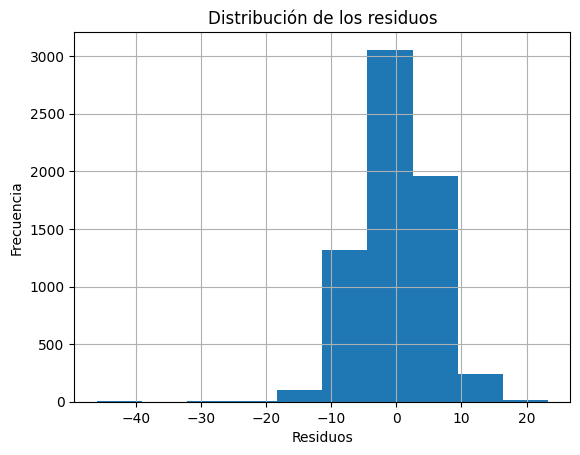

In [290]:
# Residuos

model_0.resid.hist()
plt.title('Distribución de los residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

In [291]:
# 1) Crear modelos con varias variables y comparar

model_full = ols('PE ~ AT + V + AP + RH', data=df_train).fit()
print(model_full.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.191e+04
Date:                Thu, 10 Jul 2025   Prob (F-statistic):               0.00
Time:                        12:07:49   Log-Likelihood:                -19662.
No. Observations:                6697   AIC:                         3.933e+04
Df Residuals:                    6692   BIC:                         3.937e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    446.1042     11.769     37.905      0.0

In [292]:
# 2) Crear modelos reducidos quitando variables

model_reduced_1 = ols('PE ~ AT + V + RH', data=df_train).fit()
print(model_reduced_1.summary())

model_reduced_2 = ols('PE ~ AT + AP + RH', data=df_train).fit()
print(model_reduced_2.summary())


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.904e+04
Date:                Thu, 10 Jul 2025   Prob (F-statistic):               0.00
Time:                        12:07:50   Log-Likelihood:                -19681.
No. Observations:                6697   AIC:                         3.937e+04
Df Residuals:                    6693   BIC:                         3.940e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    518.4567      0.462   1122.210      0.0

In [293]:
# 3) Calcular VIF para detectar multicolinealidad

X_train_const = sm.add_constant(X_train)

vif_df = pd.DataFrame()
vif_df['Variable'] = X_train_const.columns
vif_df['VIF'] = [vif(X_train_const.values, i) for i in range(X_train_const.shape[1])]

vif_df



,Variable,VIF
0,const,44603.788615
1,AT,6.034363
2,V,3.954998
3,AP,1.468530
4,RH,1.717508


In [294]:
variable_explicativas_m1 = ['AT', 'V', 'RH']
X1 = sm.add_constant(X_train[variable_explicativas_m1])
variable_explicativas_m2 = ['AT', 'AP', 'RH']
X2 = sm.add_constant(X_train[variable_explicativas_m2])

# VIF 1
vif_1 = pd.DataFrame()
vif_1['variables'] = X1.columns
vif_1['VIF'] = [vif(X1.values, i) for i in range(X1.shape[1])]
print(vif_1)



  variables        VIF
0     const  68.358325
1        AT   4.995739
2         V   3.896702
3        RH   1.591186


In [295]:

# VIF 2
vif_2 = pd.DataFrame()
vif_2['variables'] = X2.columns
vif_2['VIF'] = [vif(X2.values, i) for i in range(X2.shape[1])]
vif_2

,variables,VIF
0,const,44014.355564
1,AT,2.025850
2,AP,1.446885
3,RH,1.505641


In [296]:
# Prevision del los valores de entrenamiento X_train[variable_explicativas_m3]
y_previsto = model_reduced_2.predict(X_train[variable_explicativas_m2])
# Generando un scatter plot entre los valores previstos y los reales

fig = px.scatter(x = y_previsto, y = y_train, title = 'Valores previstos vs reales', labels = { 'x': 'Valores previstos', 'y': 'Valores Reales'})
fig.show()